In [261]:
import pandas as pd
import numpy as np
import random
from random import gauss
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [262]:
def CountFrequency(my_list): 
  
    # Creating an empty dictionary  
    freq = {} 
    for item in my_list: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
  
    for key, value in freq.items(): 
        print ("% d : % d"%(key, value))

In [263]:
unique_firms=[]
N=100
for i in range(N):
     unique_firms.append(np.random.choice(np.arange(1, 13), p=[0.02,0.03,0.06,0.08,0.12,0.15,0.15,0.14,0.1,0.08,0.05,0.02]))
        
CountFrequency(unique_firms)

 4 :  8
 5 :  13
 8 :  18
 3 :  5
 7 :  11
 1 :  5
 6 :  17
 11 :  2
 9 :  8
 10 :  11
 12 :  1
 2 :  1


In [264]:
len(unique_firms)

100

In [316]:
total_exp=[]
for i in range(N):
    unique_firm = unique_firms[i]
    avg_yrs = 10 + unique_firm*1
    a = gauss(avg_yrs,2)
    if a <10:
        a=10
    elif a>30:
        a=30
    total_exp.append(round(a,1))    
    

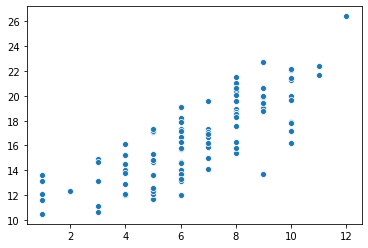

In [317]:
sns.scatterplot(x=pd.Series(unique_firms),y=pd.Series(total_exp))

In [318]:
sum(1 for i in total_exp if i>20) / 100

0.14

In [319]:
from random import *
def f(n,s):
    r=min(s,1)
    x=uniform(max(0,r-(r-s/n)*2),r)
    return n<2and[s]or sample([x]+f(n-1,s-x),n)

In [320]:
experience = []
for i in range(N):
    total_experience = total_exp[i]
    unique_firm = unique_firms[i]
    my_list = f(unique_firm,total_experience)
    experience.append([float('%.1f' % elem) for elem in my_list ])
#     print(total_experience)
#     print(unique_firm)
#     print(experience)
#     break

In [321]:
data=[]
for i in range(N):
#     a = [unique_firms[i],total_exp[i]]
    a=experience[i]
#     print(a)
    data.append(a)
print(data[0])
# df = pd.DataFrame(data, columns = ['Total Companies candidate worked with', 'Cumulative years of Experience', 'Exp'])
f = lambda x: 'Exp {}'.format(-x-1)
df = pd.DataFrame(data,dtype=object).fillna('').rename(columns=f)
df.head()

[2.9, 3.7, 1.0, 6.4]


,Exp -1,Exp -2,Exp -3,Exp -4,Exp -5,Exp -6,Exp -7,Exp -8,Exp -9,Exp -10,Exp -11,Exp -12
0,2.9,3.7,1,6.4,,,,,,,,
1,2.2,4.4,4.6,1,3,,,,,,,
2,4.5,1.8,2.1,1.4,2.9,1.2,3.3,2.5,,,,
3,1.0,5,1.6,5.3,,,,,,,,
4,2.6,2.1,3.4,1.6,4,,,,,,,


In [322]:
df['Total Companies candidate worked with'] = unique_firms
df['Cumulative years of Experience'] = total_exp
df['Exp'] = experience
df['RevExp'] = [list(reversed(exp)) for exp in experience]

In [323]:
df.head()

,Exp -1,Exp -2,Exp -3,Exp -4,Exp -5,Exp -6,Exp -7,Exp -8,Exp -9,Exp -10,Exp -11,Exp -12,Total Companies candidate worked with,Cumulative years of Experience,Exp,RevExp
0,2.9,3.7,1,6.4,,,,,,,,,4,14.0,"[2.9, 3.7, 1.0, 6.4]","[6.4, 1.0, 3.7, 2.9]"
1,2.2,4.4,4.6,1,3,,,,,,,,5,15.3,"[2.2, 4.4, 4.6, 1.0, 3.0]","[3.0, 1.0, 4.6, 4.4, 2.2]"
2,4.5,1.8,2.1,1.4,2.9,1.2,3.3,2.5,,,,,8,19.6,"[4.5, 1.8, 2.1, 1.4, 2.9, 1.2, 3.3, 2.5]","[2.5, 3.3, 1.2, 2.9, 1.4, 2.1, 1.8, 4.5]"
3,1.0,5,1.6,5.3,,,,,,,,,4,12.9,"[1.0, 5.0, 1.6, 5.3]","[5.3, 1.6, 5.0, 1.0]"
4,2.6,2.1,3.4,1.6,4,,,,,,,,5,13.6,"[2.6, 2.1, 3.4, 1.6, 4.0]","[4.0, 1.6, 3.4, 2.1, 2.6]"


In [324]:
df['Repeat'] = 0
for i in sample(range(0, 100), 25):
    df.set_value(i, 'Repeat',1)
    

C:\Users\abhishekm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [325]:
df['Repeat'].value_counts()

0    75
1    25
Name: Repeat, dtype: int64

In [326]:
df.to_csv('synthetic_data2.csv',index=False)

In [337]:
for i in sorted(sample(range(1,658),20)):
    print(i)

23
45
88
94
100
110
112
115
151
164
170
277
358
382
385
442
480
516
625
637


In [336]:
658*0.03


19.74